In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = load_breast_cancer(as_frame=True) # only features outcome in the data set
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
df1 = data['data']
df2 = pd.DataFrame({'Diagnosis': data['target']}) # used as classifer 
df = df1.join(df2)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.shape

(569, 31)

## Data inspection
Distribution of features in the dataset before clustering

In [2]:
#sns.pairplot(df, hue = "Diagnosis");

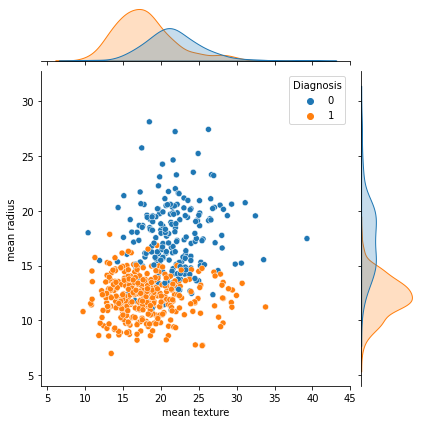

In [6]:
sns.jointplot(data = df, x = "mean texture", y = "mean radius",  hue = "Diagnosis", kind = "scatter");

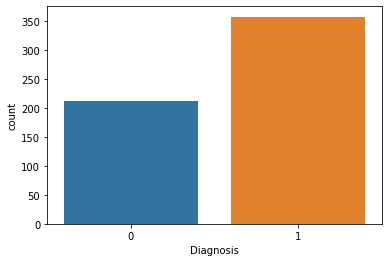

In [7]:
sns.countplot(x = "Diagnosis", data = df);

Check for variables with missing values

In [8]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Diagnosis                  0
dtype: int64

In [9]:
labels = df.pop("Diagnosis") # Target
labels.value_counts() #Distribution of features in the dataset across the true label

1    357
0    212
Name: Diagnosis, dtype: int64

## Feature Scaling
Standardization

In [10]:
df = (df-df.mean())/df.std()

## Applying K-means clustering algorithm to determine the optimal cluster

#### The Elbow method

In [11]:
# Determing number of clusters
wss = []   # list of within sum of square errors
for i in range(10):
    kmeans = KMeans(n_clusters = i + 1, random_state = 0).fit(df)
    wss.append(kmeans.inertia_) # The elbow method

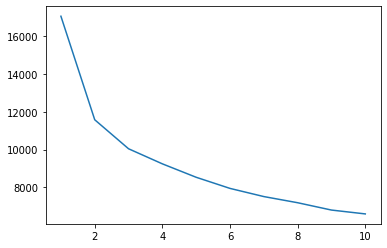

In [12]:
plt.plot(1 + np.arange(len(wss)), wss)

In [13]:
#Centroids of data points for k=7

print(kmeans.cluster_centers_)

[[-5.54429661e-01  9.86595329e-01 -5.86092792e-01 -5.40967061e-01
  -9.42348603e-01 -8.41547966e-01 -7.21711778e-01 -7.83539718e-01
  -6.00484934e-01 -4.88347833e-01 -3.21847318e-01  1.00922249e+00
  -3.50502605e-01 -3.56577721e-01 -2.18829505e-01 -4.71848183e-01
  -4.03733053e-01 -5.50600865e-01  3.72819051e-02 -2.96616768e-01
  -5.98969136e-01  8.62913047e-01 -6.29218280e-01 -5.66566472e-01
  -9.21481208e-01 -7.44824516e-01 -7.36970996e-01 -8.80587173e-01
  -5.85412606e-01 -6.23873077e-01]
 [ 3.04123029e-01 -1.46114499e-01  2.77576332e-01  1.86494852e-01
  -1.74384813e-01 -8.92039130e-02 -1.27673550e-01  7.51681563e-04
  -2.07408658e-01 -4.97093157e-01 -2.20328026e-01 -4.62052967e-01
  -2.10887834e-01 -1.61580350e-01 -5.03482037e-01 -2.33559914e-01
  -1.21203498e-01 -4.63206762e-02 -3.96250250e-01 -3.54779349e-01
   2.22024770e-01 -1.26317488e-01  2.03767338e-01  9.47909386e-02
  -1.50427187e-01 -3.23072941e-02  3.17949734e-02  1.89491265e-01
  -1.07249094e-02 -2.68158763e-01]
 [ 1.5


## The Silhouette Method

[0.3433822406907781, 0.31438400986080983, 0.2716866342764882, 0.15995992038716092, 0.16225631788919712, 0.15370005438873835, 0.1444086596085393, 0.14942206410015393, 0.14211387423186955, 0.13376143978034827]


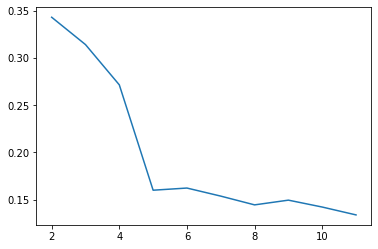

In [14]:
silhouette_scores = []
for i in range(10):
    kmeans = KMeans(n_clusters = i + 2, random_state = 0).fit(df)
    silhouette_score_ = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_score_)

print(silhouette_scores)
plt.plot(2 + np.arange(len(silhouette_scores)), silhouette_scores)


Both Silhouette score and elbow method indicate 2 clusters

In [16]:
kmeans = KMeans(n_clusters=2)
pred_labels = kmeans.fit_predict(df)
# Analysing the distribution 
matrix = pd.DataFrame({'pred_Diagnosis': pred_labels, 'Diagnosis': labels})
cross_tab = pd.crosstab(matrix['pred_Diagnosis'], matrix['Diagnosis'])
print(cross_tab)

Diagnosis         0    1
pred_Diagnosis          
0               175   14
1                37  343


## Data inspection
Distribution of features in the dataset after clustering

In [17]:
pred_labels = pd.DataFrame({'pred_Diagnosis': pred_labels})
df_new = df.join(pred_labels)
df_new.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,pred_Diagnosis
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,0
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,0
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,0
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,0
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,0


In [18]:
df_new.shape

(569, 31)

In [3]:
#sns.pairplot(df_new, hue = "pred_Diagnosis");

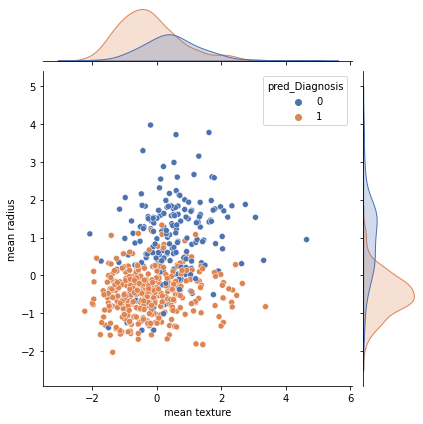

In [19]:
sns.jointplot(data = df_new, x = "mean texture", y = "mean radius", hue = "pred_Diagnosis", kind = "scatter", palette='deep');

## Applying t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [25]:
tsne = TSNE(random_state=0, perplexity=5)
tsne_data= tsne.fit_transform(df)
print(tsne_data.shape)

(569, 2)


[0.46278143, 0.46229884, 0.41564393, 0.42202297, 0.4096137, 0.42522645, 0.4300525, 0.4300989, 0.43581554, 0.43226093]


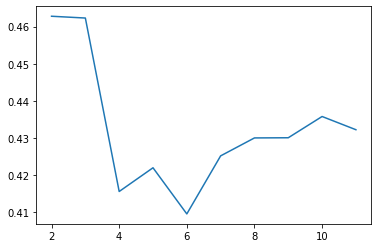

In [26]:
silhouette_scores = []
for i in range(10):
    kmeans = KMeans(n_clusters = i + 2, random_state = 0).fit(tsne_data)
    silhouette_score_ = silhouette_score(tsne_data, kmeans.labels_)
    silhouette_scores.append(silhouette_score_)

print(silhouette_scores)
plt.plot(2 + np.arange(len(silhouette_scores)), silhouette_scores)


In [31]:
kmeans = KMeans(n_clusters=2)
pred_labels = kmeans.fit_predict(tsne_data)
# Analysing the distribution (pred_Diagnosis versus Diagnosis)
matrix = pd.DataFrame({'pred_Diagnosis': pred_labels, 'Diagnosis': labels})
cross_tab = pd.crosstab(matrix['pred_Diagnosis'], matrix['Diagnosis'])
print(cross_tab)

Diagnosis         0    1
pred_Diagnosis          
0                12  318
1               200   39


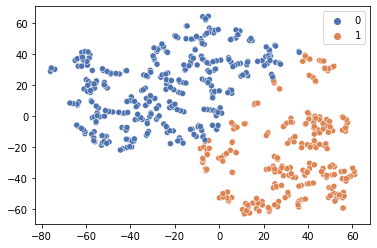

In [32]:
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=pred_labels, palette='deep',legend='full')
plt.show()

## PCA followed by t-SNE


In [33]:
pca = PCA(n_components=10, random_state=0)
pca_data = pca.fit_transform(df)
pca_data.shape

(569, 10)

In [34]:
tsne = TSNE(random_state=0, perplexity=5)
pca_tsne_data= tsne.fit_transform(pca_data)
print(pca_tsne_data.shape)

(569, 2)


[0.43494776, 0.4394052, 0.41754863, 0.41867796, 0.4196262, 0.4416122, 0.42609528, 0.41918558, 0.43334982, 0.43617955]


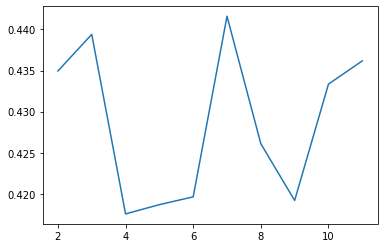

In [35]:
silhouette_scores = []
for i in range(10):
    kmeans = KMeans(n_clusters = i + 2, random_state = 0).fit(pca_tsne_data)
    silhouette_score_ = silhouette_score(pca_tsne_data, kmeans.labels_)
    silhouette_scores.append(silhouette_score_)

print(silhouette_scores)
plt.plot(2 + np.arange(len(silhouette_scores)), silhouette_scores)


In [40]:
kmeans = KMeans(n_clusters=7)
pred_labels = kmeans.fit_predict(pca_tsne_data)
# Analysing the distribution (pred_Diagnosis versus Diagnosis)
matrix = pd.DataFrame({'pred_Diagnosis': pred_labels, 'Diagnosis': labels})
cross_tab = pd.crosstab(matrix['pred_Diagnosis'], matrix['Diagnosis'])
print(cross_tab)

Diagnosis         0   1
pred_Diagnosis         
0                 2  93
1               113   0
2                26  49
3                 7  43
4                 2  71
5                59   3
6                 3  98


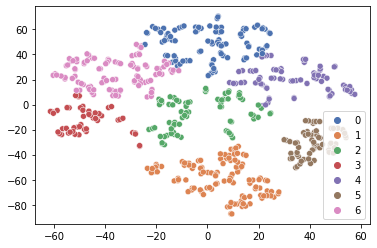

In [41]:
sns.scatterplot(x=pca_tsne_data[:,0], y=pca_tsne_data[:,1], hue=pred_labels, 
                 palette='deep',legend='full')
plt.show()

### Applying UMAP

In [42]:
umap = UMAP(random_state=0)
projections = umap.fit_transform(df)
print(projections.shape)

(569, 2)


[0.57400787, 0.47062775, 0.46060482, 0.44442177, 0.43726888, 0.4476325, 0.43962717, 0.4402335, 0.4355788, 0.44273934]


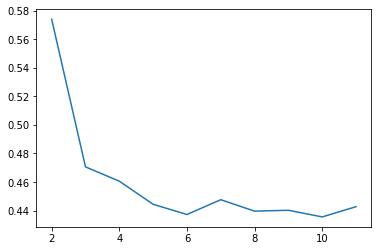

In [43]:
silhouette_scores = []
for i in range(10):
    kmeans = KMeans(n_clusters = i + 2, random_state = 0).fit(projections)
    silhouette_score_ = silhouette_score(projections, kmeans.labels_)
    silhouette_scores.append(silhouette_score_)

print(silhouette_scores)
plt.plot(2 + np.arange(len(silhouette_scores)), silhouette_scores)


In [44]:
kmeans = KMeans(n_clusters=2)
pred_labels = kmeans.fit_predict(projections)
# Analysing the distribution (pred_Diagnosis versus Diagnosis)
matrix = pd.DataFrame({'pred_Diagnosis': pred_labels, 'Diagnosis': labels})
cross_tab = pd.crosstab(matrix['pred_Diagnosis'], matrix['Diagnosis'])
print(cross_tab)

Diagnosis         0    1
pred_Diagnosis          
0                30  354
1               182    3


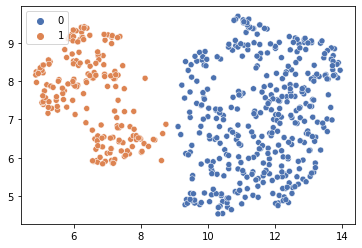

In [47]:
sns.scatterplot(x=projections[:,0], y=projections[:,1], hue=pred_labels, 
                 palette='deep',legend='full')
plt.show()

## PCA followed by UMAP


In [45]:
umap = UMAP(random_state=0)
projections_pca = umap.fit_transform(pca_data)
print(projections_pca.shape)

(569, 2)


[0.5701089, 0.47397113, 0.47035295, 0.45374542, 0.43712425, 0.45570096, 0.4428791, 0.43785107, 0.44339085, 0.4348746]


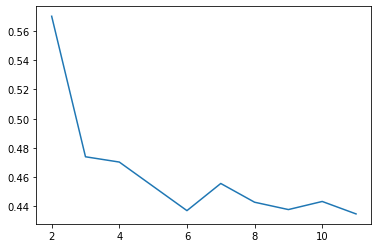

In [46]:
silhouette_scores = []
for i in range(10):
    kmeans = KMeans(n_clusters = i + 2, random_state = 0).fit(projections_pca)
    silhouette_score_ = silhouette_score(projections_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_score_)

print(silhouette_scores)
plt.plot(2 + np.arange(len(silhouette_scores)), silhouette_scores)


In [48]:
kmeans = KMeans(n_clusters=2)
pred_labels = kmeans.fit_predict(projections_pca)
# Analysing the distribution (pred_Diagnosis versus Diagnosis)
matrix = pd.DataFrame({'pred_Diagnosis': pred_labels, 'Diagnosis': labels})
cross_tab = pd.crosstab(matrix['pred_Diagnosis'], matrix['Diagnosis'])
print(cross_tab)

Diagnosis         0    1
pred_Diagnosis          
0               182    4
1                30  353


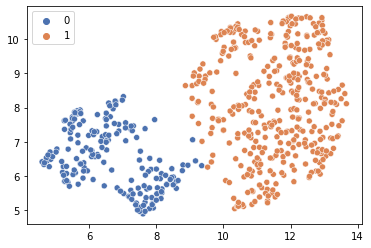

In [49]:
sns.scatterplot(x=projections_pca[:,0], y=projections_pca[:,1], hue=pred_labels, 
                 palette='deep',legend='full')
plt.show()